### imported packages

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, average_precision_score, \
classification_report, recall_score, confusion_matrix, f1_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Question 3

In [4]:
train_data = pd.read_csv('Data/train_q3.csv')
train_data.dropna(inplace=True)
#data.set_index('year', inplace=True)

train_data.head()

,driverId,constructorId,year,raceId,grid,positionOrder,statusId,circuitId,turns,lap_length,...,longest_flatout_section,downforce_level,gear_changes_per_lap,driver_error_rate,constructor_error_rate,circuit_error_rate,label,points,positionText,wins
1,1.0,1.0,2007.0,44.0,2.588235294117647,3.9411764705882355,3.2941176470588234,10.176470588235293,15.470588235294118,4.989764705882353,...,1191.4117647058824,2.588235294117647,45.529411764705884,0.009615384615384612,0.15589353612167306,0.08239753254299857,0.9411764705882353,109.0,2.0,4.0
2,1.0,1.0,2008.0,26.5,3.888888888888889,5.222222222222222,1.7222222222222223,9.5,16.666666666666668,5.045055555555554,...,1175.611111111111,2.5,46.333333333333336,0.009615384615384612,0.15589353612167306,0.07537252362333047,0.8333333333333334,98.0,1.0,5.0
3,1.0,1.0,2009.0,9.0,9.176470588235293,9.705882352941176,5.0,11.529411764705882,17.058823529411764,5.259411764705881,...,1136.0588235294117,2.7058823529411766,48.05882352941177,0.009615384615384612,0.15589353612167306,0.0708027917670016,0.5294117647058824,49.0,5.0,2.0
4,1.0,1.0,2010.0,346.0,5.157894736842105,6.421052631578948,3.0526315789473686,12.0,17.05263157894737,5.200947368421052,...,1161.4736842105262,2.5789473684210527,47.526315789473685,0.009615384615384612,0.15589353612167306,0.07523567033632704,0.7894736842105263,240.0,4.0,3.0
5,1.0,1.0,2011.0,850.0,3.5789473684210527,6.7368421052631575,1.5789473684210527,15.947368421052632,17.0,5.216052631578947,...,1130.6842105263158,2.6315789473684212,48.68421052631579,0.009615384615384612,0.15589353612167306,0.07848344494526316,0.8421052631578947,227.0,5.0,3.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 25 columns):
driverId                    202 non-null float64
constructorId               202 non-null float64
year                        202 non-null float64
raceId                      202 non-null object
grid                        202 non-null object
positionOrder               202 non-null object
statusId                    202 non-null object
circuitId                   202 non-null object
turns                       202 non-null object
lap_length                  202 non-null object
race_laps                   202 non-null object
race_distance               202 non-null object
max_speed                   202 non-null object
drs_zone                    202 non-null object
full_throttle_percentage    202 non-null object
longest_flatout_section     202 non-null object
downforce_level             202 non-null object
gear_changes_per_lap        202 non-null object
driver_error_rate           

In [6]:
train_data['driver_error_rate'] = pd.to_numeric(train_data['driver_error_rate'], downcast="float")
train_data['constructor_error_rate'] = pd.to_numeric(train_data['constructor_error_rate'], downcast="float")
train_data['circuit_error_rate'] = pd.to_numeric(train_data['circuit_error_rate'], downcast="float")

In [7]:
train_data['driver_error_rate'] = train_data['driver_error_rate']*1000
train_data['constructor_error_rate'] = train_data['constructor_error_rate']*100
train_data['circuit_error_rate'] = train_data['circuit_error_rate']*100

train_data.head()

,driverId,constructorId,year,raceId,grid,positionOrder,statusId,circuitId,turns,lap_length,...,longest_flatout_section,downforce_level,gear_changes_per_lap,driver_error_rate,constructor_error_rate,circuit_error_rate,label,points,positionText,wins
1,1.0,1.0,2007.0,44.0,2.588235294117647,3.9411764705882355,3.2941176470588234,10.176470588235293,15.470588235294118,4.989764705882353,...,1191.4117647058824,2.588235294117647,45.529411764705884,9.615385,15.589354,8.239754,0.9411764705882353,109.0,2.0,4.0
2,1.0,1.0,2008.0,26.5,3.888888888888889,5.222222222222222,1.7222222222222223,9.5,16.666666666666668,5.045055555555554,...,1175.611111111111,2.5,46.333333333333336,9.615385,15.589354,7.537252,0.8333333333333334,98.0,1.0,5.0
3,1.0,1.0,2009.0,9.0,9.176470588235293,9.705882352941176,5.0,11.529411764705882,17.058823529411764,5.259411764705881,...,1136.0588235294117,2.7058823529411766,48.05882352941177,9.615385,15.589354,7.080279,0.5294117647058824,49.0,5.0,2.0
4,1.0,1.0,2010.0,346.0,5.157894736842105,6.421052631578948,3.0526315789473686,12.0,17.05263157894737,5.200947368421052,...,1161.4736842105262,2.5789473684210527,47.526315789473685,9.615385,15.589354,7.523567,0.7894736842105263,240.0,4.0,3.0
5,1.0,1.0,2011.0,850.0,3.5789473684210527,6.7368421052631575,1.5789473684210527,15.947368421052632,17.0,5.216052631578947,...,1130.6842105263158,2.6315789473684212,48.68421052631579,9.615385,15.589354,7.848345,0.8421052631578947,227.0,5.0,3.0


In [8]:
train_data.drop(['year','raceId','statusId','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','label'], 1, inplace=True)
train_data.head()

,driverId,constructorId,grid,positionOrder,driver_error_rate,constructor_error_rate,circuit_error_rate,points,positionText,wins
1,1.0,1.0,2.588235294117647,3.9411764705882355,9.615385,15.589354,8.239754,109.0,2.0,4.0
2,1.0,1.0,3.888888888888889,5.222222222222222,9.615385,15.589354,7.537252,98.0,1.0,5.0
3,1.0,1.0,9.176470588235293,9.705882352941176,9.615385,15.589354,7.080279,49.0,5.0,2.0
4,1.0,1.0,5.157894736842105,6.421052631578948,9.615385,15.589354,7.523567,240.0,4.0,3.0
5,1.0,1.0,3.5789473684210527,6.7368421052631575,9.615385,15.589354,7.848345,227.0,5.0,3.0


In [9]:
test_data = pd.read_csv('Data/test_q3.csv')
test_data.dropna(inplace=True)
test_data['driver_error_rate'] = pd.to_numeric(test_data['driver_error_rate'], downcast="float")
test_data['constructor_error_rate'] = pd.to_numeric(test_data['constructor_error_rate'], downcast="float")
test_data['circuit_error_rate'] = pd.to_numeric(test_data['circuit_error_rate'], downcast="float")
test_data['driver_error_rate'] = test_data['driver_error_rate']*1000
test_data['constructor_error_rate'] = test_data['constructor_error_rate']*100
test_data['circuit_error_rate'] = test_data['circuit_error_rate']*100
test_data.drop(['year','raceId','statusId','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','label'], 1, inplace=True)
test_data.head()

,driverId,constructorId,grid,positionOrder,driver_error_rate,constructor_error_rate,circuit_error_rate,points,positionText,wins
1,1.0,131.0,3.473684210526316,5.947368421052632,9.615385,7.371795,7.747270,189.0,4.0,1.0
2,1.0,131.0,4.2105263157894735,4.105263157894737,9.615385,7.371795,7.240250,384.0,1.0,11.0
3,1.0,131.0,1.5789473684210527,2.5789473684210527,9.615385,7.371795,7.313430,381.0,1.0,10.0
4,1.0,131.0,4.142857142857143,3.761904761904762,9.615385,7.371795,6.897261,380.0,2.0,10.0
5,1.0,131.0,3.6,2.7,9.615385,7.371795,7.069710,363.0,1.0,9.0


In [10]:
train_label = train_data[['positionText']]
test_label = test_data[['positionText']]
train_data.drop(['positionText'], 1, inplace=True)
test_data.drop(['positionText'], 1, inplace=True)

In [11]:
train_data.values.shape

(202, 9)

In [12]:
drivers = test_data['driverId'].values
constructors = test_data['constructorId'].values

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_data)
train_data = pd.DataFrame(x_scaled, columns = train_data.columns, index=train_data.index)
train_data.head()

,driverId,constructorId,grid,positionOrder,driver_error_rate,constructor_error_rate,circuit_error_rate,points,wins
1,0.0,0.0,0.062262,0.079828,0.026904,0.486353,0.309684,0.274559,0.307692
2,0.0,0.0,0.123376,0.156714,0.026904,0.486353,0.269267,0.246851,0.384615
3,0.0,0.0,0.371826,0.425815,0.026904,0.486353,0.242975,0.123426,0.153846
4,0.0,0.0,0.183004,0.228666,0.026904,0.486353,0.268479,0.604534,0.230769
5,0.0,0.0,0.108813,0.247619,0.026904,0.486353,0.287165,0.571788,0.230769


In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_data)
test_data = pd.DataFrame(x_scaled, columns = test_data.columns, index=test_data.index)
test_data.head()

,driverId,constructorId,grid,positionOrder,driver_error_rate,constructor_error_rate,circuit_error_rate,points,wins
1,0.0,0.62201,0.088452,0.183355,0.044807,0.006788,0.293018,0.490909,0.090909
2,0.0,0.62201,0.122850,0.083083,0.044807,0.006788,0.249863,0.997403,1.000000
3,0.0,0.62201,0.000000,0.000000,0.044807,0.006788,0.256092,0.989610,0.909091
4,0.0,0.62201,0.119691,0.064392,0.044807,0.006788,0.220670,0.987013,0.909091
5,0.0,0.62201,0.094349,0.006589,0.044807,0.006788,0.235348,0.942857,0.818182


In [15]:
X_train = train_data.values
X_test = test_data.values
y_train = train_label.values
y_test = test_label.values

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(202, 9) (202, 1)
(88, 9) (88, 1)


In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

np.random.seed(10)
tf.random.set_seed(10)

histories={}

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

checkpoint_filepath = 'models/weights-improvement-{epoch:02d}-{val_mse:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

# create a network
model = Sequential([
        Dense(25, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(25, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=1000,
                             batch_size=4,
                             shuffle = True,
                             verbose = 2,
                             #callbacks = [model_checkpoint_callback],
                             validation_data=(X_test, y_test))

Epoch 1/1000
51/51 - 0s - loss: 180.1465 - mse: 180.1095 - val_loss: 159.6166 - val_mse: 159.5797
Epoch 2/1000
51/51 - 0s - loss: 142.8424 - mse: 142.8047 - val_loss: 106.6667 - val_mse: 106.6276
Epoch 3/1000
51/51 - 0s - loss: 74.0984 - mse: 74.0571 - val_loss: 40.2932 - val_mse: 40.2496
Epoch 4/1000
51/51 - 0s - loss: 30.8118 - mse: 30.7670 - val_loss: 23.0871 - val_mse: 23.0410
Epoch 5/1000
51/51 - 0s - loss: 24.4480 - mse: 24.4015 - val_loss: 17.5932 - val_mse: 17.5461
Epoch 6/1000
51/51 - 0s - loss: 20.5254 - mse: 20.4783 - val_loss: 14.2431 - val_mse: 14.1956
Epoch 7/1000
51/51 - 0s - loss: 17.8836 - mse: 17.8357 - val_loss: 10.8704 - val_mse: 10.8216
Epoch 8/1000
51/51 - 0s - loss: 18.3982 - mse: 18.3488 - val_loss: 8.8657 - val_mse: 8.8158
Epoch 9/1000
51/51 - 0s - loss: 14.2825 - mse: 14.2323 - val_loss: 7.8387 - val_mse: 7.7879
Epoch 10/1000
51/51 - 0s - loss: 13.2866 - mse: 13.2356 - val_loss: 7.4086 - val_mse: 7.3571
Epoch 11/1000
51/51 - 0s - loss: 15.8409 - mse: 15.7892 -

51/51 - 0s - loss: 9.7946 - mse: 9.7233 - val_loss: 5.0419 - val_mse: 4.9703
Epoch 90/1000
51/51 - 0s - loss: 8.3017 - mse: 8.2299 - val_loss: 4.4554 - val_mse: 4.3831
Epoch 91/1000
51/51 - 0s - loss: 6.8564 - mse: 6.7841 - val_loss: 5.3530 - val_mse: 5.2806
Epoch 92/1000
51/51 - 0s - loss: 8.9183 - mse: 8.8460 - val_loss: 4.5477 - val_mse: 4.4751
Epoch 93/1000
51/51 - 0s - loss: 7.5717 - mse: 7.4989 - val_loss: 4.7949 - val_mse: 4.7218
Epoch 94/1000
51/51 - 0s - loss: 9.2030 - mse: 9.1297 - val_loss: 6.0159 - val_mse: 5.9428
Epoch 95/1000
51/51 - 0s - loss: 10.1378 - mse: 10.0643 - val_loss: 5.9959 - val_mse: 5.9225
Epoch 96/1000
51/51 - 0s - loss: 8.7538 - mse: 8.6802 - val_loss: 4.8302 - val_mse: 4.7564
Epoch 97/1000
51/51 - 0s - loss: 8.4059 - mse: 8.3322 - val_loss: 6.5191 - val_mse: 6.4454
Epoch 98/1000
51/51 - 0s - loss: 8.6356 - mse: 8.5615 - val_loss: 6.3371 - val_mse: 6.2630
Epoch 99/1000
51/51 - 0s - loss: 8.7071 - mse: 8.6325 - val_loss: 4.6886 - val_mse: 4.6133
Epoch 100/1

Epoch 179/1000
51/51 - 0s - loss: 5.9250 - mse: 5.8241 - val_loss: 4.2043 - val_mse: 4.1033
Epoch 180/1000
51/51 - 0s - loss: 7.3789 - mse: 7.2775 - val_loss: 3.4153 - val_mse: 3.3132
Epoch 181/1000
51/51 - 0s - loss: 7.0727 - mse: 6.9712 - val_loss: 4.2515 - val_mse: 4.1498
Epoch 182/1000
51/51 - 0s - loss: 6.1002 - mse: 5.9983 - val_loss: 4.9512 - val_mse: 4.8493
Epoch 183/1000
51/51 - 0s - loss: 6.4631 - mse: 6.3609 - val_loss: 4.0844 - val_mse: 3.9819
Epoch 184/1000
51/51 - 0s - loss: 6.4457 - mse: 6.3429 - val_loss: 4.9069 - val_mse: 4.8042
Epoch 185/1000
51/51 - 0s - loss: 6.6905 - mse: 6.5872 - val_loss: 4.8474 - val_mse: 4.7439
Epoch 186/1000
51/51 - 0s - loss: 5.5299 - mse: 5.4260 - val_loss: 3.7643 - val_mse: 3.6599
Epoch 187/1000
51/51 - 0s - loss: 6.2413 - mse: 6.1368 - val_loss: 3.8987 - val_mse: 3.7941
Epoch 188/1000
51/51 - 0s - loss: 6.8825 - mse: 6.7777 - val_loss: 4.0886 - val_mse: 3.9835
Epoch 189/1000
51/51 - 0s - loss: 7.4517 - mse: 7.3467 - val_loss: 3.9523 - val_

51/51 - 0s - loss: 5.6657 - mse: 5.5329 - val_loss: 3.7880 - val_mse: 3.6551
Epoch 269/1000
51/51 - 0s - loss: 6.1385 - mse: 6.0055 - val_loss: 4.3434 - val_mse: 4.2104
Epoch 270/1000
51/51 - 0s - loss: 5.2725 - mse: 5.1394 - val_loss: 4.7191 - val_mse: 4.5860
Epoch 271/1000
51/51 - 0s - loss: 5.1926 - mse: 5.0586 - val_loss: 4.4197 - val_mse: 4.2856
Epoch 272/1000
51/51 - 0s - loss: 5.3150 - mse: 5.1804 - val_loss: 4.0226 - val_mse: 3.8876
Epoch 273/1000
51/51 - 0s - loss: 5.8365 - mse: 5.7015 - val_loss: 3.3815 - val_mse: 3.2459
Epoch 274/1000
51/51 - 0s - loss: 4.8206 - mse: 4.6854 - val_loss: 4.3821 - val_mse: 4.2470
Epoch 275/1000
51/51 - 0s - loss: 6.4548 - mse: 6.3194 - val_loss: 4.5817 - val_mse: 4.4464
Epoch 276/1000
51/51 - 0s - loss: 6.1397 - mse: 6.0043 - val_loss: 4.2889 - val_mse: 4.1532
Epoch 277/1000
51/51 - 0s - loss: 5.7026 - mse: 5.5667 - val_loss: 4.2650 - val_mse: 4.1289
Epoch 278/1000
51/51 - 0s - loss: 6.4941 - mse: 6.3577 - val_loss: 3.6360 - val_mse: 3.4989
Epo

Epoch 358/1000
51/51 - 0s - loss: 5.4351 - mse: 5.2691 - val_loss: 4.3672 - val_mse: 4.2016
Epoch 359/1000
51/51 - 0s - loss: 4.8953 - mse: 4.7301 - val_loss: 3.4914 - val_mse: 3.3258
Epoch 360/1000
51/51 - 0s - loss: 6.2486 - mse: 6.0826 - val_loss: 3.3408 - val_mse: 3.1745
Epoch 361/1000
51/51 - 0s - loss: 5.2807 - mse: 5.1144 - val_loss: 3.6519 - val_mse: 3.4856
Epoch 362/1000
51/51 - 0s - loss: 5.0256 - mse: 4.8591 - val_loss: 4.3410 - val_mse: 4.1748
Epoch 363/1000
51/51 - 0s - loss: 5.7192 - mse: 5.5528 - val_loss: 3.6888 - val_mse: 3.5219
Epoch 364/1000
51/51 - 0s - loss: 4.9358 - mse: 4.7689 - val_loss: 3.7922 - val_mse: 3.6251
Epoch 365/1000
51/51 - 0s - loss: 5.4654 - mse: 5.2979 - val_loss: 3.5904 - val_mse: 3.4226
Epoch 366/1000
51/51 - 0s - loss: 4.6356 - mse: 4.4676 - val_loss: 4.2352 - val_mse: 4.0676
Epoch 367/1000
51/51 - 0s - loss: 5.8129 - mse: 5.6452 - val_loss: 3.6454 - val_mse: 3.4772
Epoch 368/1000
51/51 - 0s - loss: 6.4020 - mse: 6.2339 - val_loss: 3.5022 - val_

51/51 - 0s - loss: 5.0716 - mse: 4.8817 - val_loss: 3.2844 - val_mse: 3.0945
Epoch 448/1000
51/51 - 0s - loss: 4.8227 - mse: 4.6331 - val_loss: 3.7146 - val_mse: 3.5242
Epoch 449/1000
51/51 - 0s - loss: 5.7084 - mse: 5.5176 - val_loss: 4.6275 - val_mse: 4.4368
Epoch 450/1000
51/51 - 0s - loss: 6.2090 - mse: 6.0186 - val_loss: 3.8283 - val_mse: 3.6378
Epoch 451/1000
51/51 - 0s - loss: 4.4724 - mse: 4.2817 - val_loss: 4.2291 - val_mse: 4.0381
Epoch 452/1000
51/51 - 0s - loss: 5.9162 - mse: 5.7256 - val_loss: 3.5227 - val_mse: 3.3319
Epoch 453/1000
51/51 - 0s - loss: 5.0922 - mse: 4.9009 - val_loss: 4.7451 - val_mse: 4.5538
Epoch 454/1000
51/51 - 0s - loss: 5.4309 - mse: 5.2396 - val_loss: 3.6607 - val_mse: 3.4692
Epoch 455/1000
51/51 - 0s - loss: 5.3240 - mse: 5.1325 - val_loss: 3.6893 - val_mse: 3.4978
Epoch 456/1000
51/51 - 0s - loss: 5.1687 - mse: 4.9769 - val_loss: 3.7805 - val_mse: 3.5883
Epoch 457/1000
51/51 - 0s - loss: 6.2077 - mse: 6.0153 - val_loss: 3.4673 - val_mse: 3.2745
Epo

Epoch 537/1000
51/51 - 0s - loss: 5.1568 - mse: 4.9424 - val_loss: 4.2422 - val_mse: 4.0284
Epoch 538/1000
51/51 - 0s - loss: 4.9075 - mse: 4.6933 - val_loss: 4.0271 - val_mse: 3.8131
Epoch 539/1000
51/51 - 0s - loss: 5.1383 - mse: 4.9243 - val_loss: 3.4669 - val_mse: 3.2525
Epoch 540/1000
51/51 - 0s - loss: 4.1041 - mse: 3.8891 - val_loss: 4.9766 - val_mse: 4.7612
Epoch 541/1000
51/51 - 0s - loss: 5.3100 - mse: 5.0946 - val_loss: 3.6142 - val_mse: 3.3987
Epoch 542/1000
51/51 - 0s - loss: 4.5466 - mse: 4.3318 - val_loss: 3.7851 - val_mse: 3.5705
Epoch 543/1000
51/51 - 0s - loss: 5.2713 - mse: 5.0567 - val_loss: 3.2958 - val_mse: 3.0807
Epoch 544/1000
51/51 - 0s - loss: 4.7975 - mse: 4.5824 - val_loss: 4.9389 - val_mse: 4.7240
Epoch 545/1000
51/51 - 0s - loss: 4.9924 - mse: 4.7771 - val_loss: 4.0245 - val_mse: 3.8093
Epoch 546/1000
51/51 - 0s - loss: 4.6187 - mse: 4.4033 - val_loss: 4.0957 - val_mse: 3.8796
Epoch 547/1000
51/51 - 0s - loss: 3.9993 - mse: 3.7828 - val_loss: 3.9390 - val_

Epoch 627/1000
51/51 - 0s - loss: 5.2079 - mse: 4.9767 - val_loss: 3.8261 - val_mse: 3.5949
Epoch 628/1000
51/51 - 0s - loss: 5.6703 - mse: 5.4390 - val_loss: 4.0385 - val_mse: 3.8074
Epoch 629/1000
51/51 - 0s - loss: 4.4178 - mse: 4.1866 - val_loss: 3.9976 - val_mse: 3.7663
Epoch 630/1000
51/51 - 0s - loss: 4.0200 - mse: 3.7888 - val_loss: 4.0826 - val_mse: 3.8513
Epoch 631/1000
51/51 - 0s - loss: 5.8850 - mse: 5.6541 - val_loss: 4.1399 - val_mse: 3.9094
Epoch 632/1000
51/51 - 0s - loss: 4.6347 - mse: 4.4041 - val_loss: 3.9402 - val_mse: 3.7096
Epoch 633/1000
51/51 - 0s - loss: 4.9475 - mse: 4.7167 - val_loss: 3.3152 - val_mse: 3.0839
Epoch 634/1000
51/51 - 0s - loss: 4.9485 - mse: 4.7173 - val_loss: 4.0650 - val_mse: 3.8339
Epoch 635/1000
51/51 - 0s - loss: 4.8461 - mse: 4.6144 - val_loss: 5.1056 - val_mse: 4.8746
Epoch 636/1000
51/51 - 0s - loss: 4.7064 - mse: 4.4751 - val_loss: 3.3216 - val_mse: 3.0899
Epoch 637/1000
51/51 - 0s - loss: 4.3222 - mse: 4.0905 - val_loss: 3.6326 - val_

Epoch 717/1000
51/51 - 0s - loss: 5.1439 - mse: 4.9051 - val_loss: 4.5309 - val_mse: 4.2920
Epoch 718/1000
51/51 - 0s - loss: 5.8081 - mse: 5.5690 - val_loss: 3.4349 - val_mse: 3.1956
Epoch 719/1000
51/51 - 0s - loss: 3.9356 - mse: 3.6965 - val_loss: 4.1905 - val_mse: 3.9513
Epoch 720/1000
51/51 - 0s - loss: 4.3257 - mse: 4.0858 - val_loss: 3.4062 - val_mse: 3.1662
Epoch 721/1000
51/51 - 0s - loss: 4.0003 - mse: 3.7611 - val_loss: 3.8132 - val_mse: 3.5745
Epoch 722/1000
51/51 - 0s - loss: 4.7214 - mse: 4.4832 - val_loss: 3.9180 - val_mse: 3.6797
Epoch 723/1000
51/51 - 0s - loss: 6.4400 - mse: 6.2016 - val_loss: 3.6946 - val_mse: 3.4565
Epoch 724/1000
51/51 - 0s - loss: 4.5316 - mse: 4.2932 - val_loss: 3.8341 - val_mse: 3.5953
Epoch 725/1000
51/51 - 0s - loss: 4.7323 - mse: 4.4937 - val_loss: 3.7696 - val_mse: 3.5311
Epoch 726/1000
51/51 - 0s - loss: 4.8671 - mse: 4.6285 - val_loss: 3.7383 - val_mse: 3.4994
Epoch 727/1000
51/51 - 0s - loss: 3.9855 - mse: 3.7463 - val_loss: 3.6329 - val_

Epoch 807/1000
51/51 - 0s - loss: 4.9650 - mse: 4.7120 - val_loss: 5.1303 - val_mse: 4.8779
Epoch 808/1000
51/51 - 0s - loss: 4.5240 - mse: 4.2715 - val_loss: 3.6167 - val_mse: 3.3639
Epoch 809/1000
51/51 - 0s - loss: 4.5313 - mse: 4.2782 - val_loss: 3.6313 - val_mse: 3.3784
Epoch 810/1000
51/51 - 0s - loss: 5.0528 - mse: 4.8003 - val_loss: 2.9895 - val_mse: 2.7366
Epoch 811/1000
51/51 - 0s - loss: 4.3523 - mse: 4.0991 - val_loss: 3.2542 - val_mse: 3.0009
Epoch 812/1000
51/51 - 0s - loss: 4.2195 - mse: 3.9661 - val_loss: 3.1527 - val_mse: 2.8987
Epoch 813/1000
51/51 - 0s - loss: 4.8890 - mse: 4.6349 - val_loss: 3.5122 - val_mse: 3.2583
Epoch 814/1000
51/51 - 0s - loss: 4.1829 - mse: 3.9294 - val_loss: 3.0438 - val_mse: 2.7899
Epoch 815/1000
51/51 - 0s - loss: 4.8371 - mse: 4.5835 - val_loss: 3.1469 - val_mse: 2.8930
Epoch 816/1000
51/51 - 0s - loss: 4.7569 - mse: 4.5030 - val_loss: 3.2597 - val_mse: 3.0055
Epoch 817/1000
51/51 - 0s - loss: 4.8369 - mse: 4.5828 - val_loss: 3.8273 - val_

51/51 - 0s - loss: 5.6328 - mse: 5.3730 - val_loss: 3.6186 - val_mse: 3.3590
Epoch 897/1000
51/51 - 0s - loss: 5.0764 - mse: 4.8167 - val_loss: 3.2064 - val_mse: 2.9464
Epoch 898/1000
51/51 - 0s - loss: 5.7310 - mse: 5.4707 - val_loss: 4.0503 - val_mse: 3.7898
Epoch 899/1000
51/51 - 0s - loss: 4.1051 - mse: 3.8445 - val_loss: 2.9611 - val_mse: 2.7001
Epoch 900/1000
51/51 - 0s - loss: 4.4790 - mse: 4.2182 - val_loss: 3.3556 - val_mse: 3.0946
Epoch 901/1000
51/51 - 0s - loss: 4.7668 - mse: 4.5056 - val_loss: 4.0062 - val_mse: 3.7454
Epoch 902/1000
51/51 - 0s - loss: 4.2628 - mse: 4.0016 - val_loss: 3.6210 - val_mse: 3.3599
Epoch 903/1000
51/51 - 0s - loss: 3.3650 - mse: 3.1039 - val_loss: 3.4793 - val_mse: 3.2182
Epoch 904/1000
51/51 - 0s - loss: 5.2707 - mse: 5.0097 - val_loss: 3.7082 - val_mse: 3.4475
Epoch 905/1000
51/51 - 0s - loss: 4.7089 - mse: 4.4480 - val_loss: 3.3482 - val_mse: 3.0876
Epoch 906/1000
51/51 - 0s - loss: 4.3146 - mse: 4.0545 - val_loss: 3.8258 - val_mse: 3.5659
Epo

Epoch 986/1000
51/51 - 0s - loss: 4.7948 - mse: 4.5341 - val_loss: 3.3698 - val_mse: 3.1092
Epoch 987/1000
51/51 - 0s - loss: 4.7589 - mse: 4.4983 - val_loss: 3.4980 - val_mse: 3.2371
Epoch 988/1000
51/51 - 0s - loss: 4.6394 - mse: 4.3782 - val_loss: 3.3504 - val_mse: 3.0887
Epoch 989/1000
51/51 - 0s - loss: 4.7986 - mse: 4.5363 - val_loss: 3.7097 - val_mse: 3.4472
Epoch 990/1000
51/51 - 0s - loss: 4.7126 - mse: 4.4498 - val_loss: 3.4953 - val_mse: 3.2324
Epoch 991/1000
51/51 - 0s - loss: 4.0259 - mse: 3.7633 - val_loss: 3.2554 - val_mse: 2.9919
Epoch 992/1000
51/51 - 0s - loss: 4.4284 - mse: 4.1646 - val_loss: 3.7073 - val_mse: 3.4435
Epoch 993/1000
51/51 - 0s - loss: 4.8780 - mse: 4.6143 - val_loss: 3.9054 - val_mse: 3.6421
Epoch 994/1000
51/51 - 0s - loss: 5.1007 - mse: 4.8378 - val_loss: 3.5871 - val_mse: 3.3242
Epoch 995/1000
51/51 - 0s - loss: 4.4930 - mse: 4.2296 - val_loss: 3.5582 - val_mse: 3.2947
Epoch 996/1000
51/51 - 0s - loss: 3.9095 - mse: 3.6464 - val_loss: 3.7098 - val_

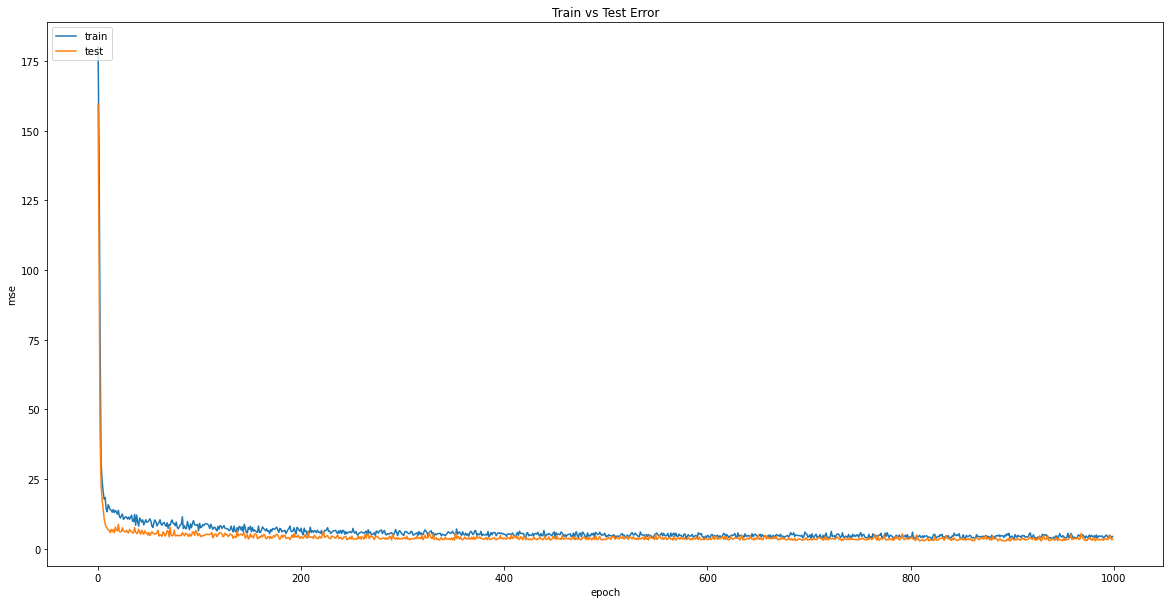

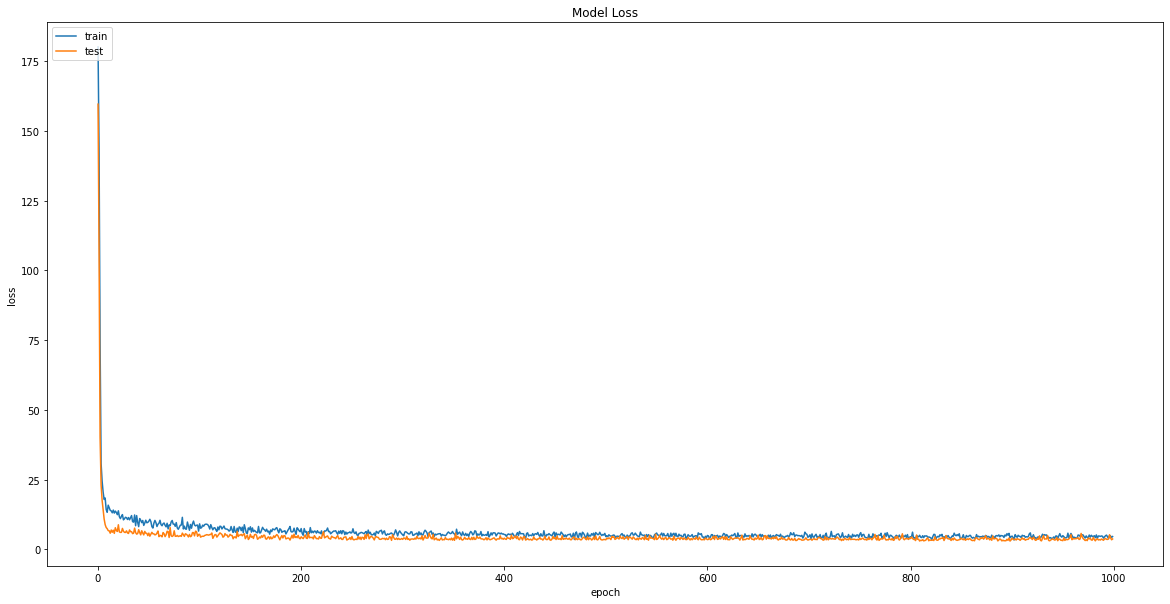

In [17]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from tensorflow import keras
model = keras.models.load_model("models/weights-improvement-449-2.52.h5")

In [19]:
predictions = model.predict(X_test)

In [20]:
predictions

array([[ 3.3320749],
       [ 1.4572319],
       [ 1.4797257],
       [ 1.5190712],
       [ 1.5591756],
       [11.94497  ],
       [ 5.9018106],
       [ 7.4486885],
       [ 6.661966 ],
       [ 3.0740669],
       [ 1.8100562],
       [ 1.7411736],
       [ 1.5596449],
       [ 2.2309067],
       [ 4.0402617],
       [ 3.2540407],
       [ 3.717348 ],
       [ 5.712303 ],
       [16.261143 ],
       [ 3.2790136],
       [ 3.6074405],
       [ 5.5031447],
       [21.645277 ],
       [ 8.322917 ],
       [18.307125 ],
       [ 6.1296268],
       [ 5.7962027],
       [ 9.696369 ],
       [ 9.154446 ],
       [ 9.54205  ],
       [22.587315 ],
       [22.681787 ],
       [19.581371 ],
       [14.188444 ],
       [ 3.8605247],
       [ 2.9669216],
       [ 3.6223161],
       [ 6.099746 ],
       [ 5.4454355],
       [14.279199 ],
       [13.20409  ],
       [23.251308 ],
       [ 3.0696225],
       [ 5.194648 ],
       [ 2.2585344],
       [17.636587 ],
       [ 9.402719 ],
       [17.11

In [21]:
predictions= np.round(predictions, 0)
predictions

array([[ 3.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [12.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 3.],
       [ 4.],
       [ 6.],
       [16.],
       [ 3.],
       [ 4.],
       [ 6.],
       [22.],
       [ 8.],
       [18.],
       [ 6.],
       [ 6.],
       [10.],
       [ 9.],
       [10.],
       [23.],
       [23.],
       [20.],
       [14.],
       [ 4.],
       [ 3.],
       [ 4.],
       [ 6.],
       [ 5.],
       [14.],
       [13.],
       [23.],
       [ 3.],
       [ 5.],
       [ 2.],
       [18.],
       [ 9.],
       [17.],
       [ 8.],
       [24.],
       [20.],
       [25.],
       [ 9.],
       [10.],
       [11.],
       [ 5.],
       [24.],
       [19.],
       [19.],
       [23.],
       [24.],
       [24.],
       [25.],
       [13.],
       [12.],
       [22.],
       [22.],
       [19.],
       [12.],
       [24.],
       [11.],
      

In [22]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test
df['Driver'] = drivers
df['Contructors'] = constructors

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,predicted,actual,Driver,Contructors
0,3.0,4.0,1.0,131.0
1,1.0,1.0,1.0,131.0
2,1.0,1.0,1.0,131.0
3,2.0,2.0,1.0,131.0
4,2.0,1.0,1.0,131.0
5,12.0,11.0,2.0,4.0
6,6.0,7.0,3.0,131.0
7,7.0,7.0,3.0,131.0
8,7.0,9.0,3.0,131.0
9,3.0,6.0,3.0,131.0


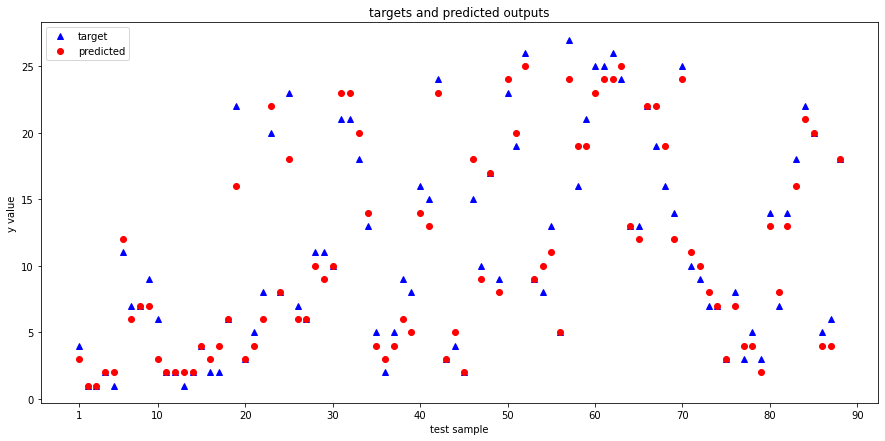

In [24]:
plt.figure(figsize=(15,7))
for i in range(0,88):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, predictions[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50,60,70,80,90])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

In [25]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=1):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range (1 position difference): " + str((count/88)*100) + "%")

number of predictions within acceptable range: 60
percentage of predictions within acceptable range (1 position difference): 68.18181818181817%


In [26]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=2):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range (2 position difference): " + str((count/88)*100) + "%")

number of predictions within acceptable range: 78
percentage of predictions within acceptable range (2 position difference): 88.63636363636364%
